In [138]:
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import cmcrameri.cm as ccm
import cmocean.cm as cmo

# initial visualisations of Gordon's data

In [70]:
ddir = "../Data/"
de = pd.read_csv(ddir + "drought_events.csv", delimiter=";", decimal=',')
de = de.rename({"station": "gauge_id"}, axis='columns')
dt30 = pd.read_csv(ddir + "DT30.csv", delimiter=";", decimal=',')
dt30 = dt30.rename({"station": "gauge_id"}, axis='columns')
dt30c = pd.read_csv(ddir + "DT30_change.csv", delimiter=";", decimal=',')
dt30c = dt30c.rename({"station": "gauge_id"}, axis='columns')
dt30u = pd.read_csv(ddir + "DT30_change_uncertainty.csv", delimiter=";", decimal=',')
dt30u = dt30u.rename({"station": "gauge_id"}, axis='columns')

Getting shapefiles from the camelsgb dataset to match with the station id's

In [68]:
# load camels topographic info
clim_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_climatic_attributes.csv")
# clim_cgb = clim_cgb.rename({"ID": "station_ID"}, axis='columns')
hi_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_humaninfluence_attributes.csv")
# hi_cgb = hi_cgb.rename({"ID": "station_ID"}, axis='columns')
hg_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_hydrogeology_attributes.csv")
# hg_cgb = hg_cgb.rename({"ID": "station_ID"}, axis='columns')
hyd_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_hydrologic_attributes.csv")
# hyd_cgb = hyd_cgb.rename({"ID": "station_ID"}, axis='columns')
hm_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_hydrometry_attributes.csv")
# hm_cgb = hm_cgb.rename({"ID": "station_ID"}, axis='columns')
lc_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_landcover_attributes.csv")
# lc_cgb = lc_cgb.rename({"ID": "station_ID"}, axis='columns')
soil_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_soil_attributes.csv")
# soil_cgb = soil_cgb.rename({"ID": "station_ID"}, axis='columns')
topo_cgb = pd.read_csv(ddir + "camels-gb/data/CAMELS_GB_topographic_attributes.csv")
# topo_cgb = topo_cgb.rename({"ID": "station_ID"}, axis='columns')

,gauge_id,sand_perc,sand_perc_missing,silt_perc,silt_perc_missing,clay_perc,clay_perc_missing,organic_perc,organic_perc_missing,bulkdens,...,root_depth,root_depth_missing,root_depth_5,root_depth_50,root_depth_95,soil_depth_pelletier,soil_depth_pelletier_missing,soil_depth_pelletier_5,soil_depth_pelletier_50,soil_depth_pelletier_95
0,10002,40.98,0.00,35.60,0.00,23.42,0.00,5.22,0.00,1.20,...,1.20,0.00,0.5,1.3,1.3,13.21,0.0,1.0,2.0,41.0
1,10003,43.79,0.00,37.96,0.00,18.25,0.00,1.58,0.00,1.29,...,1.01,0.00,0.5,1.3,1.3,7.52,0.0,1.0,1.0,30.0
2,1001,39.25,3.16,31.97,3.16,28.79,3.16,19.32,3.16,0.74,...,1.30,3.16,1.3,1.3,1.3,14.54,0.0,1.0,17.0,43.0
3,101002,70.99,0.00,15.36,0.00,13.66,0.00,0.43,0.00,1.55,...,1.26,0.00,1.3,1.3,1.3,2.80,0.0,1.0,1.0,11.0
4,101005,71.01,0.00,15.56,0.00,13.45,0.00,0.45,0.00,1.54,...,1.25,0.00,1.3,1.3,1.3,3.38,0.0,1.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,95001,47.75,12.80,24.31,12.80,27.93,12.80,12.64,12.80,1.02,...,0.91,11.91,0.3,1.3,1.3,1.03,0.0,0.0,1.0,1.0
667,96001,41.07,0.58,26.97,0.58,31.97,0.58,25.52,0.58,0.53,...,1.24,0.58,0.5,1.3,1.3,5.48,0.0,1.0,1.0,25.0
668,96002,42.42,5.00,24.10,5.00,33.48,5.00,12.65,5.00,0.96,...,1.06,4.46,0.3,1.3,1.3,1.76,0.0,1.0,1.0,2.0
669,96004,48.17,3.10,23.40,3.10,28.42,3.10,17.41,3.10,0.85,...,1.04,3.10,0.3,1.3,1.3,0.89,0.0,0.0,1.0,1.0


In [77]:
# load camels catchment boundaries
poly_cgb = gpd.read_file(ddir + "camels-gb/data/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp")
poly_cgb = poly_cgb.rename({"ID": "gauge_id"}, axis='columns')

In [96]:
# join data to the shapefiles
# Camels-GB
geo_clim_cgb = poly_cgb.merge(clim_cgb, on="gauge_id")
geo_clim_cgb = geo_clim_cgb.set_index('gauge_id')
geo_hi_cgb = poly_cgb.merge(hi_cgb, on="gauge_id")
geo_hi_cgb = geo_hi_cgb.set_index('gauge_id')
geo_hg_cgb = poly_cgb.merge(hg_cgb, on="gauge_id")
geo_hg_cgb = geo_hg_cgb.set_index('gauge_id')
geo_hyd_cgb = poly_cgb.merge(hyd_cgb, on="gauge_id")
geo_hyd_cgb = geo_hyd_cgb.set_index('gauge_id')
geo_hm_cgb = poly_cgb.merge(hm_cgb, on="gauge_id")
geo_hm_cgb = geo_hm_cgb.set_index('gauge_id')
geo_lc_cgb = poly_cgb.merge(lc_cgb, on="gauge_id")
geo_lc_cgb = geo_lc_cgb.set_index('gauge_id')
geo_soil_cgb = poly_cgb.merge(soil_cgb, on="gauge_id")
geo_soil_cgb = geo_soil_cgb.set_index('gauge_id')
geo_topo_cgb = poly_cgb.merge(topo_cgb, on="gauge_id")
geo_topo_cgb = geo_topo_cgb.set_index('gauge_id')
# EDGE
geo_de = poly_cgb.merge(de, on="gauge_id")
geo_de = geo_de.set_index('gauge_id')
geo_dt30 = poly_cgb.merge(dt30, on="gauge_id")
geo_dt30 = geo_dt30.set_index('gauge_id')
geo_dt30c = poly_cgb.merge(dt30c, on="gauge_id")
geo_dt30c = geo_dt30c.set_index('gauge_id')
geo_dt30u = poly_cgb.merge(dt30u, on="gauge_id")
geo_dt30u = geo_dt30u.set_index('gauge_id')

In [113]:
# identify gauges that are in CGB and dt30:
stations_analyzed = set(dt30['gauge_id'].unique())
stations_cgb = set(poly_cgb['gauge_id'].unique())
stations_common = stations_cgb.intersection(stations_analyzed)
len(stations_analyzed)  # 248
len(stations_common)   # 193

In [170]:
geo_lc_cgb['wood_perc'] = geo_lc_cgb['dwood_perc']+geo_lc_cgb['ewood_perc']
geo_hi_cgb['total_abs'] = geo_hi_cgb['surfacewater_abs'] + geo_hi_cgb['groundwater_abs']
geo_hi_cgb['abs_agriculture_mm-d'] = geo_hi_cgb['total_abs'] * geo_hi_cgb['abs_agriculture_perc'] / 100
geo_hi_cgb['abs_environmental_mm-d'] = geo_hi_cgb['total_abs'] * geo_hi_cgb['abs_environmental_perc'] / 100

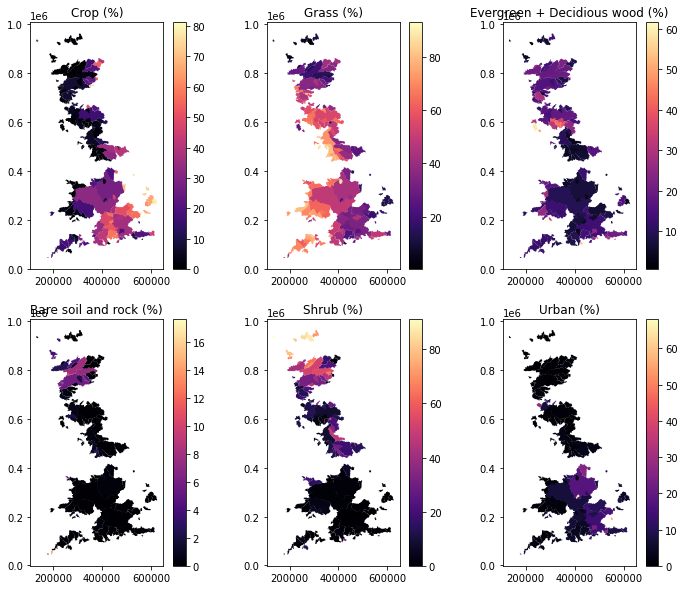

In [162]:
# plot
ncol=3
nrow=2
fig,axes = plt.subplots(nrow, ncol, figsize=(ncol*4, nrow*5))
axes=axes.ravel()
geo_lc_cgb.loc[stations_common,:].plot(column="crop_perc", legend=True,
                                       cmap="magma", ax=axes[0])
axes[0].set_title("Crop (%)")
geo_lc_cgb.loc[stations_common,:].plot(column="grass_perc", legend=True,
                                       cmap="magma", ax=axes[1])
axes[1].set_title("Grass (%)")
geo_lc_cgb.loc[stations_common,:].plot(column="wood_perc", legend=True,
                                       cmap="magma", ax=axes[2])
axes[2].set_title("Evergreen + Decidious wood (%)")
geo_lc_cgb.loc[stations_common,:].plot(column="bares_perc", legend=True,
                                       cmap="magma", ax=axes[3])
axes[3].set_title("Bare soil and rock (%)")
geo_lc_cgb.loc[stations_common,:].plot(column="shrub_perc", legend=True,
                                       cmap="magma", ax=axes[4])
axes[4].set_title("Shrub (%)")
geo_lc_cgb.loc[stations_common,:].plot(column="urban_perc", legend=True,
                                       cmap="magma", ax=axes[5])
axes[5].set_title("Urban (%)")
plt.savefig("../figures/land-cover_camelsgb_analyzedcatchments.png")

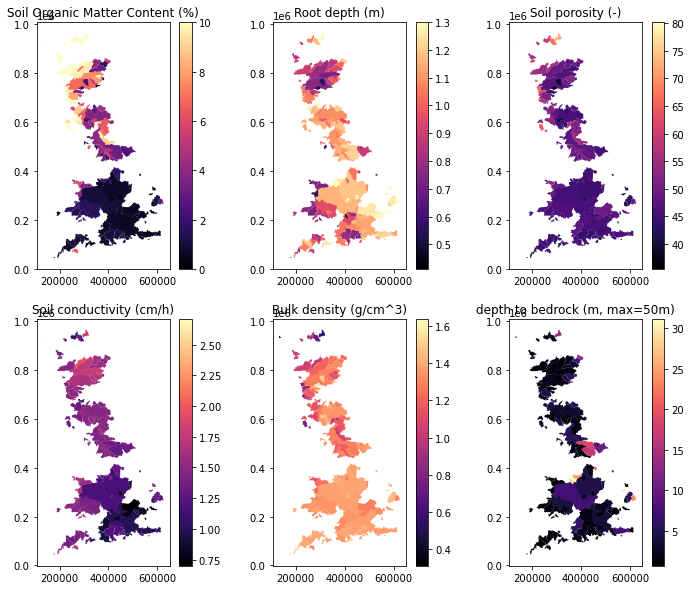

In [183]:
ncol=3
nrow=2
fig,axes = plt.subplots(nrow, ncol, figsize=(ncol*4, nrow*5))
axes=axes.ravel()
geo_soil_cgb.loc[stations_common,:].plot(column="organic_perc", legend=True,
                                         cmap="magma", ax=axes[0], vmin=0, vmax=10)
axes[0].set_title("Soil Organic Matter Content (%)")
geo_soil_cgb.loc[stations_common, :].plot(column='root_depth', legend=True,
                                          cmap="magma", ax=axes[1])
axes[1].set_title("Depth available for root (m)")
geo_soil_cgb.loc[stations_common, :].plot(column='porosity_hypres', legend=True,
                                          cmap="magma", ax=axes[2])
axes[2].set_title("Soil porosity (-)")
geo_soil_cgb.loc[stations_common, :].plot(column='conductivity_hypres', legend=True,
                                          cmap="magma", ax=axes[3])
axes[3].set_title("Soil conductivity (cm/h)")
geo_soil_cgb.loc[stations_common, :].plot(column='bulkdens', legend=True,
                                          cmap="magma", ax=axes[4])
axes[4].set_title("Bulk density (g/cm^3)")
geo_soil_cgb.loc[stations_common, :].plot(column='soil_depth_pelletier', legend=True,
                                          cmap="magma", ax=axes[5])
axes[5].set_title("Depth to bedrock (m, max=50m)")
plt.savefig("../figures/soil_properties_for_NBS_improvement.png")

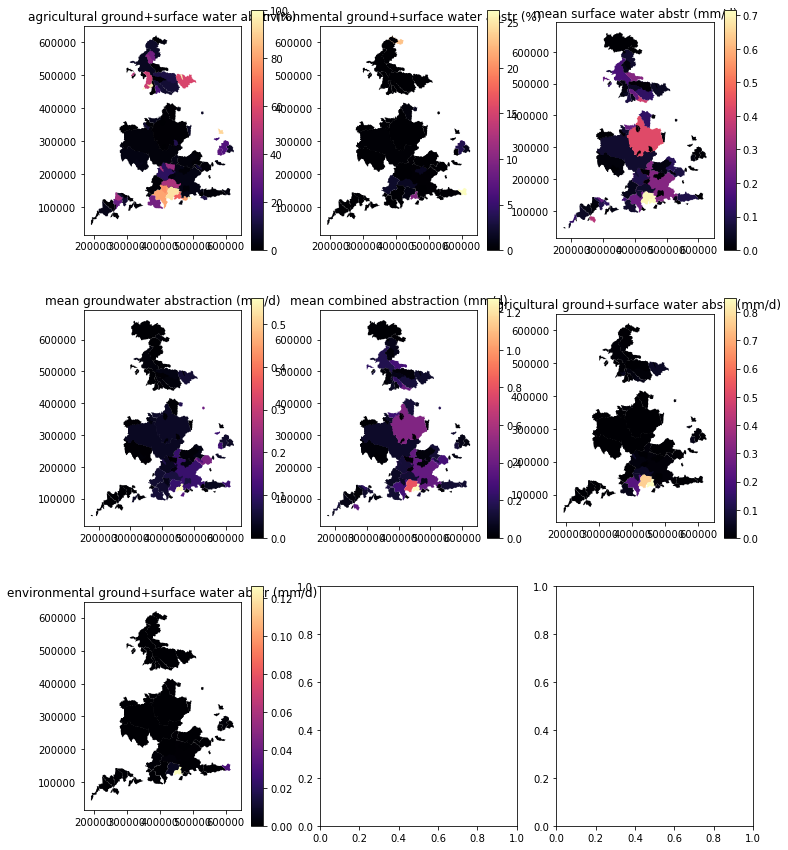

In [175]:
ncol=3
nrow=3
fig,axes = plt.subplots(nrow, ncol, figsize=(ncol*4, nrow*5))
axes=axes.ravel()
geo_hi_cgb.loc[stations_common, :].plot(column='abs_agriculture_perc', legend=True,
                                          cmap="magma", ax=axes[0])
axes[0].set_title("agricultural ground+surface water abstr (%)")
geo_hi_cgb.loc[stations_common, :].plot(column='abs_environmental_perc', legend=True,
                                          cmap="magma", ax=axes[1])
axes[1].set_title("environmental ground+surface water abstr (%)")
geo_hi_cgb.loc[stations_common, :].plot(column='surfacewater_abs', legend=True,
                                          cmap="magma", ax=axes[2])
axes[2].set_title("mean surface water abstr (mm/d)")
geo_hi_cgb.loc[stations_common, :].plot(column='groundwater_abs', legend=True,
                                          cmap="magma", ax=axes[3])
axes[3].set_title("mean groundwater abstraction (mm/d)")
geo_hi_cgb.loc[stations_common, :].plot(column='total_abs', legend=True,
                                          cmap="magma", ax=axes[4])
axes[4].set_title("mean combined abstraction (mm/d)")
geo_hi_cgb.loc[stations_common, :].plot(column='abs_agriculture_mm-d', legend=True,
                                          cmap="magma", ax=axes[5])
axes[5].set_title("agricultural ground+surface water abstr (mm/d)")
geo_hi_cgb.loc[stations_common, :].plot(column='abs_environmental_mm-d', legend=True,
                                          cmap="magma", ax=axes[6])
axes[6].set_title("environmental ground+surface water abstr (mm/d)")
plt.savefig("../figures/abstraction_data.png")

In [125]:
geo_clim_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry', 'p_mean',
       'pet_mean', 'aridity', 'p_seasonality', 'frac_snow', 'high_prec_freq',
       'high_prec_dur', 'high_prec_timing', 'low_prec_freq', 'low_prec_dur',
       'low_prec_timing'],
      dtype='object')

In [126]:
geo_hg_cgb.columns


Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry',
       'inter_high_perc', 'inter_mod_perc', 'inter_low_perc', 'frac_high_perc',
       'frac_mod_perc', 'frac_low_perc', 'no_gw_perc', 'low_nsig_perc',
       'nsig_low_perc'],
      dtype='object')

In [127]:
geo_hi_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry',
       'benchmark_catch', 'surfacewater_abs', 'groundwater_abs', 'discharges',
       'abs_agriculture_perc', 'abs_amenities_perc', 'abs_energy_perc',
       'abs_environmental_perc', 'abs_industry_perc', 'abs_watersupply_perc',
       'num_reservoir', 'reservoir_cap', 'reservoir_he', 'reservoir_nav',
       'reservoir_drain', 'reservoir_wr', 'reservoir_fs', 'reservoir_env',
       'reservoir_nousedata', 'reservoir_year_first', 'reservoir_year_last'],
      dtype='object')

In [128]:
geo_soil_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry', 'sand_perc',
       'sand_perc_missing', 'silt_perc', 'silt_perc_missing', 'clay_perc',
       'clay_perc_missing', 'organic_perc', 'organic_perc_missing', 'bulkdens',
       'bulkdens_missing', 'bulkdens_5', 'bulkdens_50', 'bulkdens_95', 'tawc',
       'tawc_missing', 'tawc_5', 'tawc_50', 'tawc_95', 'porosity_cosby',
       'porosity_cosby_missing', 'porosity_cosby_5', 'porosity_cosby_50',
       'porosity_cosby_95', 'porosity_hypres', 'porosity_hypres_missing',
       'porosity_hypres_5', 'porosity_hypres_50', 'porosity_hypres_95',
       'conductivity_cosby', 'conductivity_cosby_missing',
       'conductivity_cosby_5', 'conductivity_cosby_50',
       'conductivity_cosby_95', 'conductivity_hypres',
       'conductivity_hypres_missing', 'conductivity_hypres_5',
       'conductivity_hypres_50', 'conductivity_hypres_95', 'root_depth',
       'root_depth_missing', 'root_depth_5', 'root_depth_50', 'root_depth_95',
       'so

In [129]:
geo_hm_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry',
       'station_type', 'flow_period_start', 'flow_period_end',
       'flow_perc_complete', 'bankfull_flow', 'structurefull_flow',
       'q5_uncert_upper', 'q5_uncert_lower', 'q25_uncert_upper',
       'q25_uncert_lower', 'q50_uncert_upper', 'q50_uncert_lower',
       'q75_uncert_upper', 'q75_uncert_lower', 'q95_uncert_upper',
       'q95_uncert_lower', 'q99_uncert_upper', 'q99_uncert_lower',
       'quncert_meta'],
      dtype='object')

In [130]:
geo_hyd_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry', 'q_mean',
       'runoff_ratio', 'stream_elas', 'slope_fdc', 'baseflow_index',
       'baseflow_index_ceh', 'hfd_mean', 'Q5', 'Q95', 'high_q_freq',
       'high_q_dur', 'low_q_freq', 'low_q_dur', 'zero_q_freq'],
      dtype='object')

In [131]:
geo_hm_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry',
       'station_type', 'flow_period_start', 'flow_period_end',
       'flow_perc_complete', 'bankfull_flow', 'structurefull_flow',
       'q5_uncert_upper', 'q5_uncert_lower', 'q25_uncert_upper',
       'q25_uncert_lower', 'q50_uncert_upper', 'q50_uncert_lower',
       'q75_uncert_upper', 'q75_uncert_lower', 'q95_uncert_upper',
       'q95_uncert_lower', 'q99_uncert_upper', 'q99_uncert_lower',
       'quncert_meta'],
      dtype='object')

In [132]:
geo_topo_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry', 'gauge_name',
       'gauge_lat', 'gauge_lon', 'gauge_easting', 'gauge_northing',
       'gauge_elev', 'area', 'dpsbar', 'elev_mean', 'elev_min', 'elev_10',
       'elev_50', 'elev_90', 'elev_max'],
      dtype='object')

In [133]:
geo_lc_cgb.columns

Index(['ID_STRING', 'SOURCE', 'VERSION', 'EXPORTED', 'geometry', 'dwood_perc',
       'ewood_perc', 'grass_perc', 'shrub_perc', 'crop_perc', 'urban_perc',
       'inwater_perc', 'bares_perc', 'dom_land_cover'],
      dtype='object')

gauge_id
10002.0     1.20
10003.0     1.01
1001.0      1.30
101002.0    1.26
101005.0    1.25
            ... 
95001.0     0.91
96001.0     1.24
96002.0     1.06
96004.0     1.04
97002.0     1.29
Name: root_depth, Length: 671, dtype: float64